# Wykorzystane kształy fynkcji przynależności

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2.1,2.1,100)
x_range = 2
zf= np.maximum(-1, np.minimum(1, -1/x_range*x))
sf= np.maximum(-1, np.minimum(1, 1/x_range*x))

plt.figure()
plt.plot(x, zf, label='N')
plt.plot(x, sf, label='P')
plt.legend()
plt.xlabel('Crisp value')
plt.ylabel('Membership function')

plt.figure()
plt.plot([-x_range, -x_range], [0, 1], label='N')
plt.plot([0, 0], [0, 1], label='Z')
plt.plot([x_range, x_range], [0, 1], label='P')
plt.legend()
plt.xlabel('Crisp value')
plt.ylabel('Membership function')

 # Implementacja modelu rozmytego w bibliotece Fuzzy logic

In [ ]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import R, S, triangular
import matplotlib.pyplot as plt

# Precyzja obliczeń
prec = 0.001

# Definicja zmiennej rozmyte e
e_dom = Domain("e", -1, 1, prec)
e_dom.N = S(-1,1)
e_dom.P = R(-1,1)
plt.figure()
e_dom.N.plot()
e_dom.P.plot()
plt.title('Zmienna lingwistyczna e')

# Definicja zmiennej rozmyte de
de_dom = Domain("de", -1, 1, prec)
de_dom.N = S(-1,1)
de_dom.P = R(-1,1)
plt.figure()
de_dom.N.plot()
de_dom.P.plot()
plt.title('Zmienna lingwistyczna de')

# Definicja zmiennej rozmyte dCV
dcv_dom = Domain("dCV", -1-prec, 1+prec, prec)
dcv_dom.N = triangular(-1-prec, -1+prec)
dcv_dom.Z = triangular(-prec, prec)
dcv_dom.P = triangular(1-prec, 1+prec)
plt.figure()
dcv_dom.N.plot()
dcv_dom.Z.plot()
dcv_dom.P.plot()
plt.title('Zmienna lingwistyczna dCV')

# Definicja reguł wnioskowania
R1 = Rule({(e_dom.N, de_dom.N): dcv_dom.N})
R2 = Rule({(e_dom.N, de_dom.P): dcv_dom.Z})
R3 = Rule({(e_dom.P, de_dom.N): dcv_dom.Z})
R4 = Rule({(e_dom.P, de_dom.P): dcv_dom.P})

# Definicja bazy wiedzy modelu rozmytego
rules = R1 | R2 | R3 | R4

# Przykład wnioskowania
values = {e_dom: -0.25, de_dom: -0.005}
print(R1(values), R2(values), R3(values), R4(values), "=>", rules(values))

# Testy regulatora rozmytego

|======================================--| 96%

<Figure size 640x480 with 0 Axes>

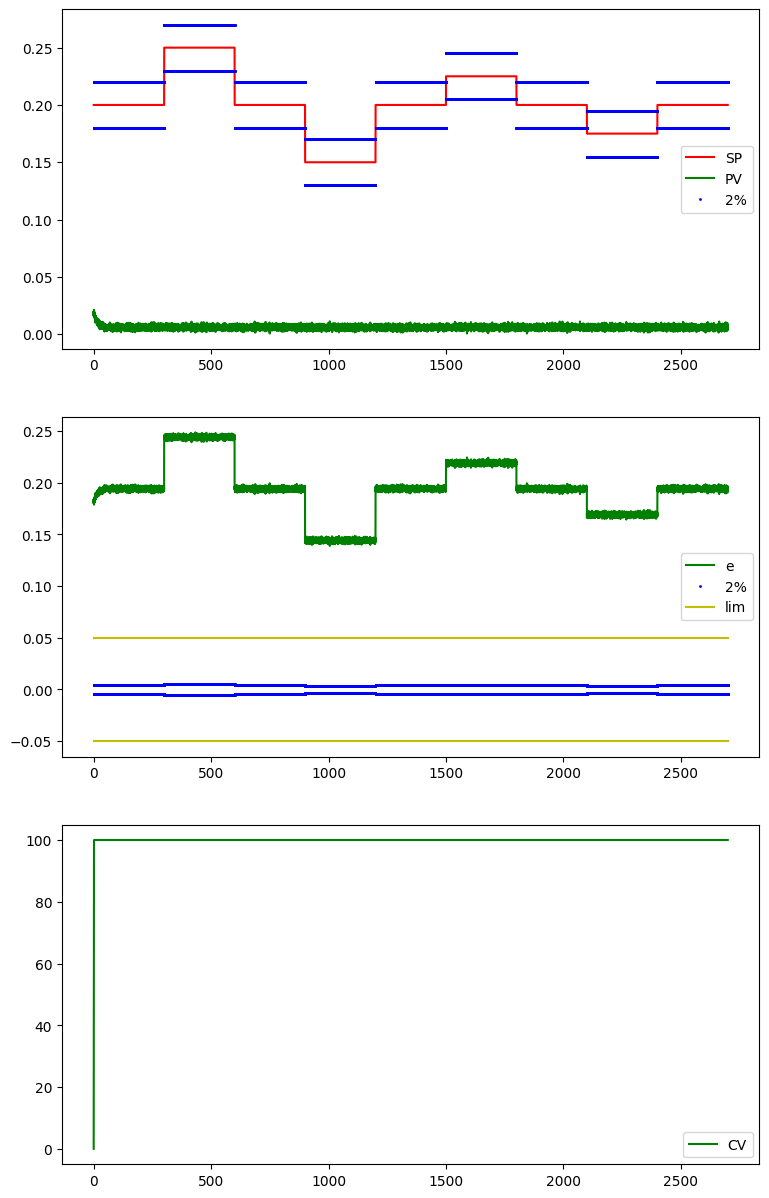

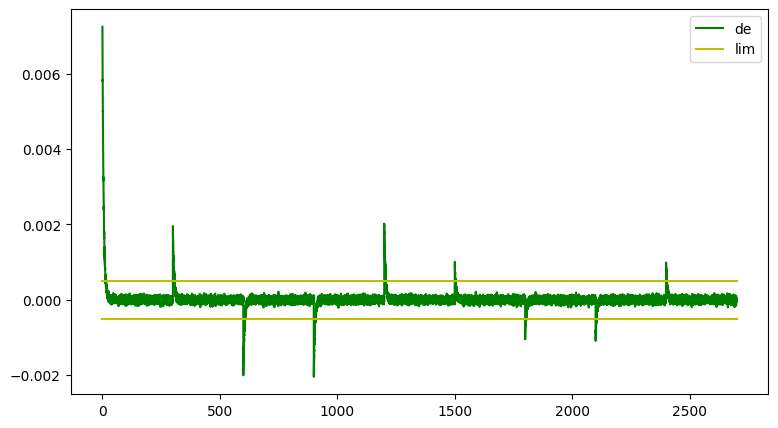

In [1]:
from params.general_params import *
from subsystems.simulator import TtsPidSim
from common.utils import *

# Utworzenie obiektu symulacji
system = TtsPidSim(tp, pr, True)

# Parametryzacja
# - ogólne
system.in_var_val('SPmode', 3)
tend = 2700
dtc = tp*pr['control']
# - regulator rozmyty
system.in_var_val('ke', 0.05)
system.in_var_val('kde', 0.0005)
system.in_var_val('kdCV', 10/dtc)

# Wyniki dla wartości domyślnych
proc_vars = system.simulate(tend, 'control')
show_evaluation(proc_vars['t'], proc_vars['SP'], proc_vars['PV'], proc_vars['e'], proc_vars['CV'], None, 0.05)

plt.figure(figsize=(9, 5))
plt.plot(proc_vars['t'], proc_vars['de'], label='de', color='g')
plt.plot([0, tend], [system.in_var_val('kde'), system.in_var_val('kde')], label='lim', color='y')
plt.plot([0, tend], [-system.in_var_val('kde'), -system.in_var_val('kde')], color='y')
plt.legend()